# **Univariate, Bivariate, and Multivariate Analysis**
**Author: Krishnagopal Halder**

Univariate, bivariate, and multivariate analysis are terms used in statistics and data analysis to describe different types of analytical approaches that involve one, two, or more variables, respectively. These methods are used to understand relationships, patterns, and trends within data sets.

## **Import Required Library** 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Load the CSV Data**

In [2]:
# Define the path of the csv
data_path = r"D:\Coding\Datasets\seattle-weather.csv"
# Read the data with pandas
df = pd.read_csv(data_path)

In [3]:
# Print the first 5 rows of the data
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## **Data Exploration**

In [4]:
# Check the shape of the data
df.shape

(1461, 6)

In [5]:
# Check whether the data contains null values or not
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
# Check the datatype of all the columns
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [7]:
# Describe the data
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
# Check all the unique weathers in the 'weather' column
df["weather"].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

## **Univariate Analysis**
Univariate analysis focuses on a single variable at a time. It involves examining and summarizing the characteristics and properties of that variable, such as its distribution, central tendency (mean, median, mode), dispersion (range, variance, standard deviation), and any relevant graphs or charts. Univariate analysis is often the first step in exploring a dataset and gaining insights into the individual variable's behavior.

Example: Analyzing the distribution of exam scores for a single subject.

**Quick Notes:**
* **loc:**<br>
The loc method is primarily label-based indexing. It is used to select data based on the labels of rows and columns. You can use meaningful index labels to retrieve specific data points or slices of data from your DataFrame.
```python
df.loc[row_labels, column_labels]
```
* **iloc**<br>
The iloc method is integer-based indexing. It is used to select data based on the integer positions of rows and columns. You can use integer indices to retrieve specific data points or slices of data.
```python
df.iloc[row_indices, column_indices]
```

In [9]:
# Select all the records where the weather is 'rain'
df_rain = df.loc[df["weather"]=="rain"]
# Select all the records where the weather is 'sun'
df_sun = df.loc[df["weather"]=="sun"]
# Select all the records where the weather is 'fog'
df_fog = df.loc[df["weather"]=="fog"]

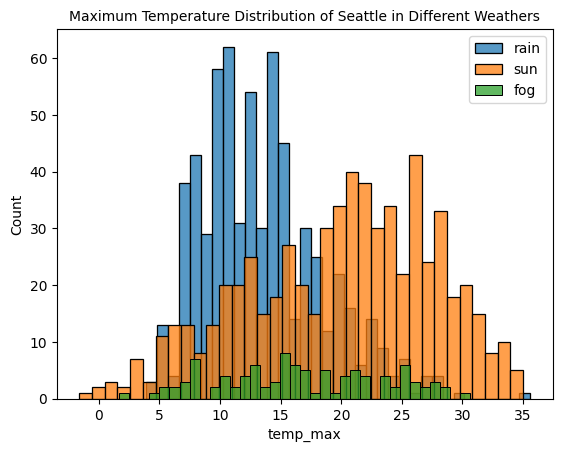

In [10]:
# Plot the histograms of the maximum temperature for all weather
for data in (df_rain, df_sun, df_fog):
    columnNames = df_rain.columns
    sns.histplot(data["temp_max"], bins=35, label=data["weather"].iloc[0])
plt.title("Maximum Temperature Distribution of Seattle in Different Weathers", 
          fontsize=10)
plt.legend()
plt.show()

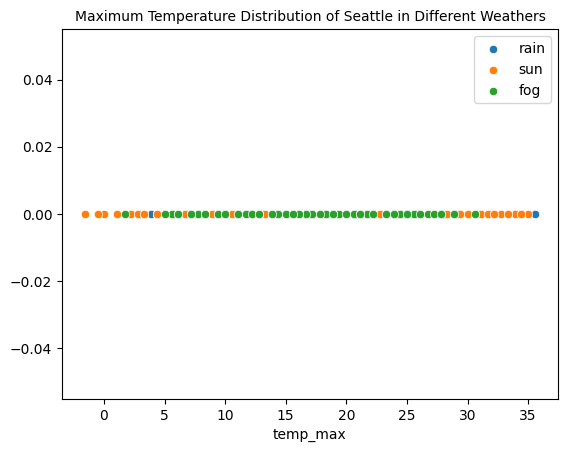

In [11]:
# Plot the points of the maximum temperature for all weather
for data in (df_rain, df_sun, df_fog):
    sns.scatterplot(x=data["temp_max"], y=np.zeros_like(data["weather"]),
                    label=data["weather"].iloc[0])
plt.title("Maximum Temperature Distribution of Seattle in Different Weathers", 
          fontsize=10)
plt.legend()
plt.show()

## **Bivariate Analysis**
Bivariate analysis involves the study of the relationship between two variables. It aims to determine whether a correlation or association exists between these two variables and to what extent they affect each other. Bivariate analysis can include techniques like scatter plots, correlation coefficients, and regression analysis to explore how changes in one variable relate to changes in another.

Example: Investigating the relationship between a person's age and their income.

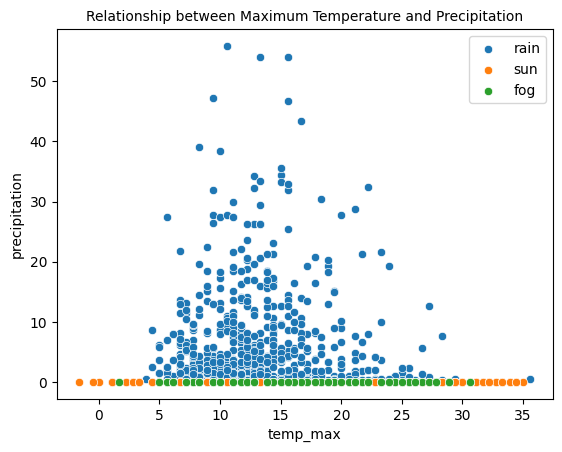

In [12]:
# Plot the scatterplot between the maximum temperature and rainfall for all weather
for data in (df_rain, df_sun, df_fog):
    sns.scatterplot(x=data["temp_max"], y=data["precipitation"], label=data["weather"].iloc[0])
plt.title("Relationship between Maximum Temperature and Precipitation", fontsize=10)
plt.legend()
plt.show()

## **Multivariate Analysis**
Multivariate analysis deals with the simultaneous study of three or more variables. It examines complex relationships and interactions between multiple variables to uncover patterns, dependencies, and underlying structures within a dataset. Multivariate analysis methods include techniques like factor analysis, principal component analysis, and multivariate regression.

Example: Studying the impact of factors such as age, education, and experience on job performance.

In [13]:
# Concatenate 'df_rain', 'df_sun', and 'df_fog' along columns
new_df = pd.concat([df_rain, df_sun, df_fog])

In [14]:
# Reset the index of the new dataframe
new_df.reset_index(drop=True, inplace=True)
new_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-02,10.9,10.6,2.8,4.5,rain
1,2012-01-03,0.8,11.7,7.2,2.3,rain
2,2012-01-04,20.3,12.2,5.6,4.7,rain
3,2012-01-05,1.3,8.9,2.8,6.1,rain
4,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1377,2015-11-20,0.0,8.3,0.6,4.0,fog
1378,2015-11-22,0.0,10.0,1.7,3.1,fog
1379,2015-11-29,0.0,1.7,-2.1,0.9,fog
1380,2015-12-19,0.0,8.3,2.8,4.1,fog


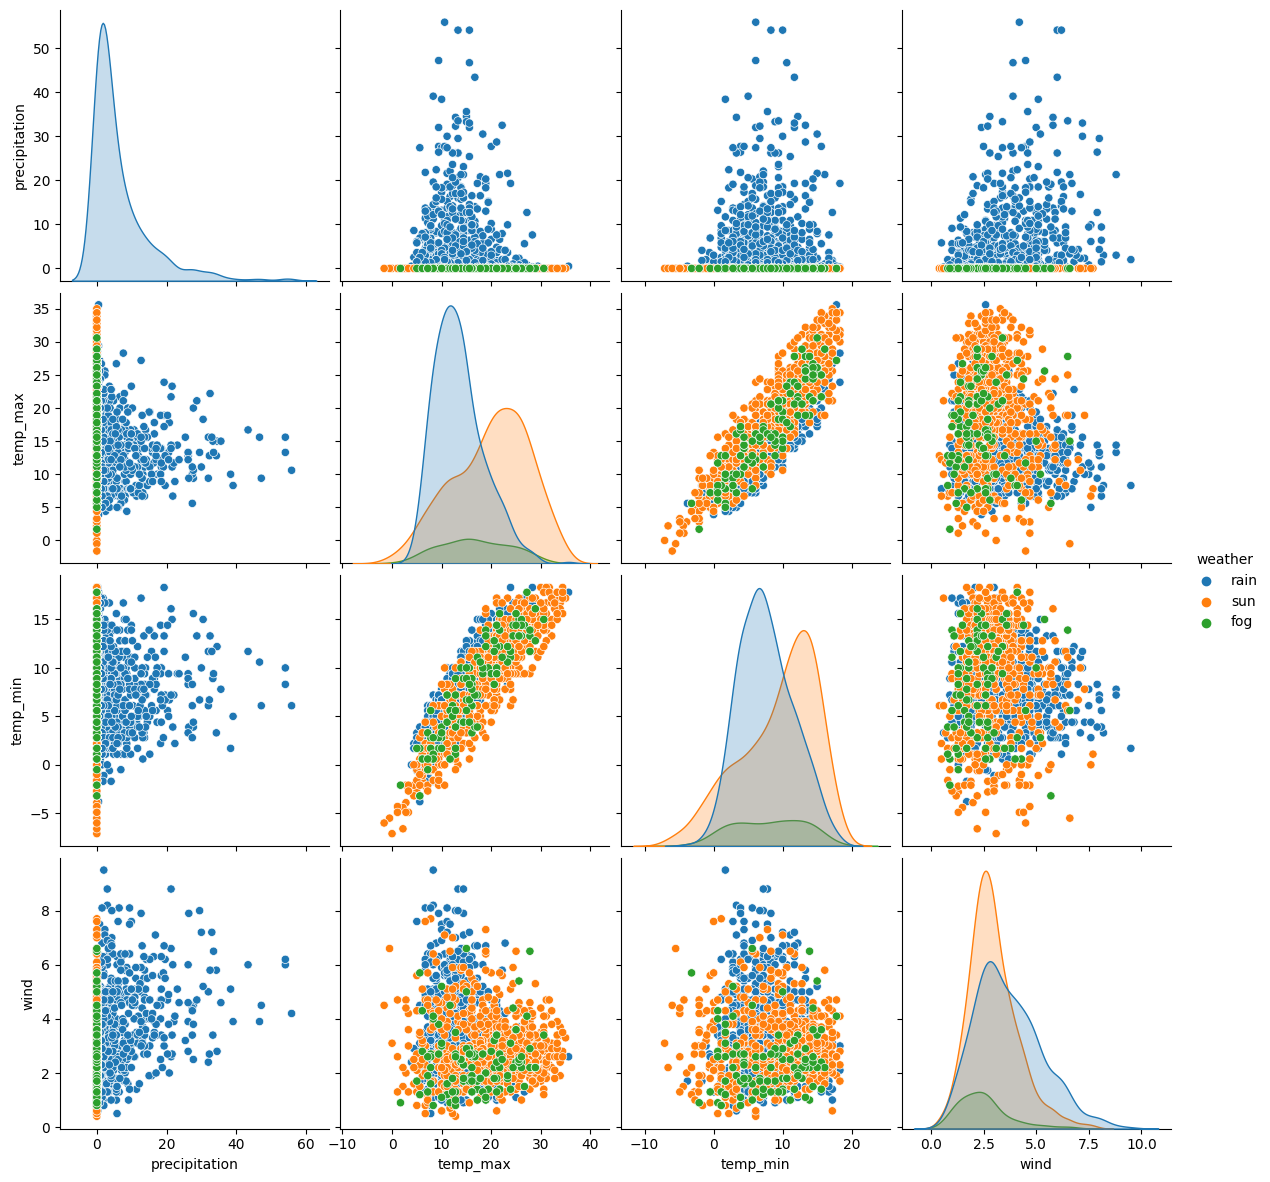

In [15]:
# Plot a pairplot of the new dataframe
sns.pairplot(data=new_df, hue="weather", size=3)
plt.show()